In [56]:
#importing the required libraries

import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)

#viz Libraries
import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

#warnings
import warnings
warnings.filterwarnings("ignore")

#datetime
import datetime as dt

#StandardSccaler
from sklearn.preprocessing import StandardScaler

#KMeans
from sklearn.cluster import KMeans



In [57]:
df = pd.read_csv('C:/Users/vedan/Desktop/LP3/MLPY/sales_data_sample.csv', encoding='unicode_escape')

In [58]:
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# Calculate Recency, Frequency and Monetary value for each customer
# latest date in the data set
snapshot_date = df['ORDERDATE'].max() + dt.timedelta(days=1)
df_RFM = df.groupby(['CUSTOMERNAME']).agg({
    'ORDERDATE': lambda x: (snapshot_date - x.max()).days,
    'ORDERNUMBER': 'count',
    'SALES': 'sum'})

# Renaming the columns
df_RFM.rename(columns={'ORDERDATE': 'Recency',
                       'ORDERNUMBER': 'Frequency',
                       'SALES': 'MonetaryValue'}, inplace=True)


In [59]:
data = df_RFM[['Recency','Frequency','MonetaryValue']]
data.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",196,51,157807.81
Alpha Cognac,65,20,70488.44
Amica Models & Co.,265,26,94117.26
"Anna's Decorations, Ltd",84,46,153996.13
Atelier graphique,188,7,24179.96


In [60]:
data_log = np.log(data)
data_log.head()

,Recency,Frequency,MonetaryValue
CUSTOMERNAME,,,
"AV Stores, Co.",5.278115,3.931826,11.969133
Alpha Cognac,4.174387,2.995732,11.163204
Amica Models & Co.,5.579730,3.258097,11.452297
"Anna's Decorations, Ltd",4.430817,3.828641,11.944683
Atelier graphique,5.236442,1.945910,10.093279


In [61]:
#Standardizing the variables using StandardScaler() for equal variance and mean
# Initialize a scaler
scaler = StandardScaler()

# Fit the scaler
# scaler.fit(data_log)

# Scale and center the data
data_normalized = scaler.fit_transform(data_log)

# Create a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized, index=data_log.index, columns=data_log.columns)

# Print summary statistics
data_normalized.describe().round(2)

,Recency,Frequency,MonetaryValue
count,92.00,92.00,92.00
mean,0.00,-0.00,0.00
std,1.01,1.01,1.01
min,-3.51,-3.67,-3.82
25%,-0.24,-0.41,-0.39
50%,0.37,0.06,-0.04
75%,0.53,0.45,0.52
max,1.12,4.03,3.92


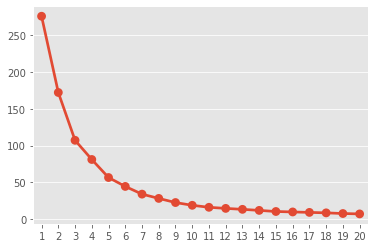

In [62]:
#Choosing number of Clusters using Elbow Method
# Fit KMeans and calculate SSE for each k
sse={}
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(data_normalized)
    sse[k] = kmeans.inertia_ 

    


# Plot SSE values for each key in the dictionary
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
# plt.text(4.5,60,"Largest Angle",bbox=dict(facecolor='lightgreen', alpha=0.5))
plt.show()

In [63]:
#Running KMeans with 5 clusters
# Initialize KMeans
kmeans = KMeans(n_clusters=5, random_state=1) 

# Fit k-means clustering on the normalized data set
kmeans.fit(data_normalized)

# Extract cluster labels
cluster_labels = kmeans.labels_

# Assigning Cluster Labels to Raw Data
# Create a DataFrame by adding a new cluster label column
data_rfm = data.assign(Cluster=cluster_labels)
data_rfm.head()

,Recency,Frequency,MonetaryValue,Cluster
CUSTOMERNAME,,,,
"AV Stores, Co.",196,51,157807.81,3
Alpha Cognac,65,20,70488.44,0
Amica Models & Co.,265,26,94117.26,0
"Anna's Decorations, Ltd",84,46,153996.13,3
Atelier graphique,188,7,24179.96,2
